In [58]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer



In [59]:
# cleaning daata and replacing \ with''  # #
csv_file_path = 'amazon_baby.csv'
product = pd.read_csv(csv_file_path)

selected_columns = ['name','review','rating']  # Replace with your column names
product[selected_columns] = product[selected_columns].replace("\\\\", '', regex=True)

product.to_csv('amazon_baby.csv', index=False)

In [60]:
# # making a column with the values of repeteation of each word in the column of review # #
def generator():
    for review in product['review']:
        frequency = (dict(Counter(str(review).split())))
        yield frequency
gene_result = generator()

product['word-count'] = list(gene_result)
# Save directly as dictionary without converting to string
product.to_csv('amazon_baby.csv', index=False)
# Find rows where 'word-count' is '{nan:1}'
rows_to_delete = product['word-count'].astype(str).str.strip() == "{'nan': 1}"
# Remove rows where 'word-count' is '{nan:1}'
product = product[~rows_to_delete]
product.to_csv('amazon_baby.csv', index=False)


In [61]:
# in this line we ignore all 3 stars#
product=product[product['rating']!=3]
#we have positive sentiment which is 4 or greater than 4###
product['sentiment'] = product['rating'].apply(lambda x: 1 if x >= 4 else 0)
product=product.reset_index(drop=True)
product.to_csv('amazon_baby.csv', index=False)

print(len(product))

165975


In [62]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [63]:
#we decided to make a dataframe that saves the number of repeat of each 'selected-word' items 

frequency = {word: [] for word in selected_words}

for review in product['review']:
    review=review
    word_counts = Counter(str(review).lower().split())
    for word in selected_words:
        frequency[word].append(word_counts.get(word, 0))

result = pd.DataFrame(frequency)
result

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
165970,0,2,0,0,0,0,0,0,0,0,0
165971,0,1,0,0,0,0,0,0,0,0,0
165972,0,2,0,0,0,0,0,0,0,0,0
165973,0,0,0,0,0,0,0,0,0,0,0


In [64]:
product = pd.concat([product,result], axis=1)
product.to_csv('amazon_baby.csv',index=False)

In [65]:
for i in selected_words:
    print(i,product[i].sum())

awesome 2002
great 42420
fantastic 873
amazing 1305
love 40277
horrible 659
bad 3197
terrible 673
awful 345
wow 131
hate 1057


In [66]:
X_train, X_val, y_train, y_val = train_test_split(product[selected_words], product['sentiment'], test_size=0.2, random_state=42)
# print(X_train)
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [67]:
model.score(X_val,y_val)

0.845820153637596

In [68]:

predicted_sentiment= model.predict_proba(product[selected_words])
pd.DataFrame(predicted_sentiment, columns=['احتمال گروه منفی مدل 1', ' احتمال گروه مثبت مدل 1'])
product['positive selected words model 1']=predicted_sentiment[:,1]
product['negative selected words model1'] = predicted_sentiment[:,0]
product

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1
0,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400
1,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
2,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",1,0,0,0,0,2,0,0,0,0,0,0,0.985296,0.014704
3,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715
4,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",1,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165970,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,"{'Such': 1, 'a': 1, 'great': 2, 'idea!': 1, 'v...",1,0,2,0,0,0,0,0,0,0,0,0,0.958345,0.041655
165971,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,"{'This': 1, 'product': 2, 'rocks!': 1, 'It': 1...",1,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715
165972,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,"{'This': 1, 'item': 1, 'looks': 1, 'great': 2,...",1,0,2,0,0,0,0,0,0,0,0,0,0.958345,0.041655
165973,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,"{'I': 9, 'am': 2, 'extremely': 1, 'happy': 1, ...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935


In [69]:
coefficients = model.coef_
sorted_coefficients = sorted(coefficients[0], reverse=True)
sorted_coefficients

[1.4245334142690462,
 1.158094626945114,
 0.9761576968677907,
 0.8900321920194236,
 0.8567012583560423,
 0.21502859869023438,
 -0.963528467070995,
 -1.4198994570553551,
 -1.582120433602311,
 -2.0106160240783995,
 -2.03669412361662]

In [70]:
coef_dict = dict(zip(selected_words, model.coef_[0]))
coef_dict

{'awesome': 1.158094626945114,
 'great': 0.8900321920194236,
 'fantastic': 0.8567012583560423,
 'amazing': 0.9761576968677907,
 'love': 1.4245334142690462,
 'horrible': -2.0106160240783995,
 'bad': -0.963528467070995,
 'terrible': -2.03669412361662,
 'awful': -1.582120433602311,
 'wow': 0.21502859869023438,
 'hate': -1.4198994570553551}

In [71]:
sorted_products_by_sentiment=product.sort_values(by='sentiment')
sorted_products_by_sentiment

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1
144488,Bellotte Designer Shopper Tote Diaper Bag in Ruby,Thought I got a good deal for a designer diape...,1,"{'Thought': 1, 'I': 1, 'got': 1, 'a': 5, 'good...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
75586,Dreambaby Angle Locks 4 Pack,I donot recommend this to anyone.The lock fell...,1,"{'I': 1, 'donot': 1, 'recommend': 1, 'this': 1...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
75587,Dreambaby Angle Locks 4 Pack,They lasted one week & started peeling off my ...,1,"{'They': 1, 'lasted': 1, 'one': 1, 'week': 1, ...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
75588,Dreambaby Angle Locks 4 Pack,My 16 month old pulled one open right after I ...,2,"{'My': 1, '16': 1, 'month': 1, 'old': 1, 'pull...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
75589,Dreambaby Angle Locks 4 Pack,"I don't like to write bad reviews, but I was v...",2,"{'I': 2, 'don't': 1, 'like': 1, 'to': 5, 'writ...",0,0,0,0,0,0,0,1,0,0,0,0,0.596813,0.403187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60800,Kidswitch Light Switch Extender- 3 Pack,"these things are great, really easy to install...",5,"{'these': 2, 'things': 1, 'are': 2, 'great,': ...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400
60801,Kidswitch Light Switch Extender- 3 Pack,Super fun for our 2 and 4 year olds to both be...,5,"{'Super': 1, 'fun': 1, 'for': 1, 'our': 1, '2'...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
60802,Kidswitch Light Switch Extender- 3 Pack,Got this for my 2 1/2 year old. Put in the bat...,5,"{'Got': 1, 'this': 1, 'for': 1, 'my': 2, '2': ...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400
60786,Kidswitch Light Switch Extender- 3 Pack,When we were visiting my parents house my olde...,5,"{'When': 1, 'we': 1, 'were': 1, 'visiting': 1,...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400


In [72]:
# examining on just one sampel
# X_val
predict_sample=X_val.loc[[93582]]
predict_sample
predictions = model.predict_proba(predict_sample)
predictions


array([[0.2049348, 0.7950652]])

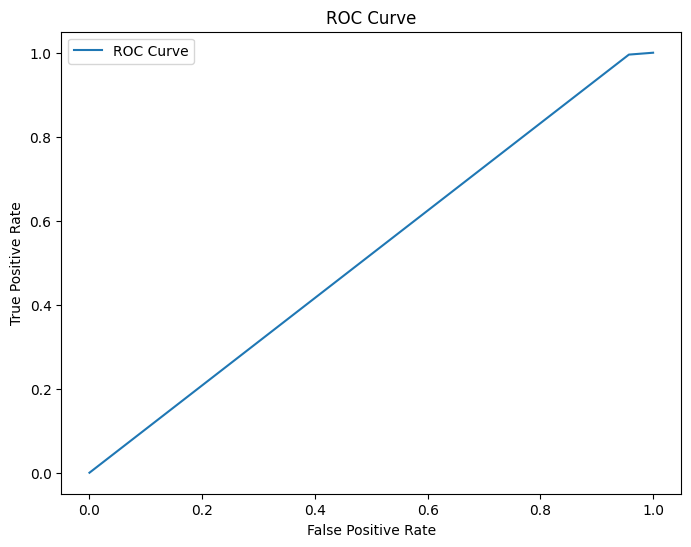

In [73]:
# Get predictions from the trained model (assuming you have them)
y_pred = model.predict(X_val)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Plot the curves (using matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [74]:
diaper_champ_reviews = product[product['name']== 'Baby Trend Diaper Champ']
diaper_champ_reviews

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1
284,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We'...,4,"{'Ok': 1, '-': 3, 'newsflash.': 1, 'Diapers': ...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
285,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1,"{'My': 1, 'husband': 1, 'and': 8, 'I': 2, 'sel...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
286,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5,"{'Excellent': 1, 'diaper': 1, 'disposal': 1, '...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
287,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5,"{'We': 1, 'love': 1, 'our': 2, 'diaper': 4, 'c...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400
288,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5,"{'Two': 1, 'girlfriends': 1, 'and': 11, 'two':...",1,0,0,0,0,0,1,0,0,0,0,0,0.341890,0.658110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Baby Trend Diaper Champ,"Its a good product because its easy to use, an...",4,"{'Its': 1, 'a': 3, 'good': 2, 'product': 1, 'b...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
578,Baby Trend Diaper Champ,this works really well. I found it easier tha...,5,"{'this': 1, 'works': 1, 'really': 1, 'well.': ...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935
579,Baby Trend Diaper Champ,This truly is the champ of diapers. This produ...,5,"{'This': 2, 'truly': 1, 'is': 2, 'the': 7, 'ch...",1,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715
580,Baby Trend Diaper Champ,I've read all of the reviews of those of you w...,2,"{'I've': 1, 'read': 1, 'all': 3, 'of': 6, 'the...",0,0,0,0,0,0,0,1,0,0,0,0,0.596813,0.403187


In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = diaper_champ_reviews.dropna() 

def dict_to_features(text_dict):
    features = ' '.join([word + ' ' for word, count in text_dict.items() for _ in range(count)])
    return features

# Extract dictionary and sentiment columns
text_dicts = data['word-count']
sentiment = data['sentiment']

# Convert dictionaries to features
data['text_features'] = text_dicts.apply(dict_to_features)

# Vectorize the text features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text_features'])

y = sentiment

# Split the data into train and test sets
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LogisticRegression()
model2.fit(X_train_model2, y_train_model2)

# Now you can use the trained model for predictions on the test set
predictions = model2.predict_proba(X_test_model2)

In [76]:
model2.score(X_test_model2,y_test_model2)

0.9

In [77]:
predicted_sentiment_model2= model2.predict_proba(X)
pd.DataFrame(predicted_sentiment, columns=[' احتمال گروه منفی مدل 2' , 'احتمال گروه مثبت مدل 2'])
diaper_champ_reviews['positive selected words model2']=predicted_sentiment_model2[:,1]
diaper_champ_reviews['negative selected words model2'] = predicted_sentiment_model2[:,0]
diaper_champ_reviews

C:\Users\mahsima\AppData\Local\Temp\ipykernel_4576\2466575799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diaper_champ_reviews['positive selected words model2']=predicted_sentiment_model2[:,1]
C:\Users\mahsima\AppData\Local\Temp\ipykernel_4576\2466575799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diaper_champ_reviews['negative selected words model2'] = predicted_sentiment_model2[:,0]


,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1,positive selected words model2,negative selected words model2
284,Baby Trend Diaper Champ,Ok - newsflash. Diapers are just smelly. We'...,4,"{'Ok': 1, '-': 3, 'newsflash.': 1, 'Diapers': ...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.975978,0.024022
285,Baby Trend Diaper Champ,"My husband and I selected the Diaper ""Champ"" m...",1,"{'My': 1, 'husband': 1, 'and': 8, 'I': 2, 'sel...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.050457,0.949543
286,Baby Trend Diaper Champ,Excellent diaper disposal unit. I used it in ...,5,"{'Excellent': 1, 'diaper': 1, 'disposal': 1, '...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.931115,0.068885
287,Baby Trend Diaper Champ,We love our diaper champ. It is very easy to ...,5,"{'We': 1, 'love': 1, 'our': 2, 'diaper': 4, 'c...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400,0.996315,0.003685
288,Baby Trend Diaper Champ,Two girlfriends and two family members put me ...,5,"{'Two': 1, 'girlfriends': 1, 'and': 11, 'two':...",1,0,0,0,0,0,1,0,0,0,0,0,0.341890,0.658110,0.988411,0.011589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,Baby Trend Diaper Champ,"Its a good product because its easy to use, an...",4,"{'Its': 1, 'a': 3, 'good': 2, 'product': 1, 'b...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.993948,0.006052
578,Baby Trend Diaper Champ,this works really well. I found it easier tha...,5,"{'this': 1, 'works': 1, 'really': 1, 'well.': ...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.999828,0.000172
579,Baby Trend Diaper Champ,This truly is the champ of diapers. This produ...,5,"{'This': 2, 'truly': 1, 'is': 2, 'the': 7, 'ch...",1,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715,0.954826,0.045174
580,Baby Trend Diaper Champ,I've read all of the reviews of those of you w...,2,"{'I've': 1, 'read': 1, 'all': 3, 'of': 6, 'the...",0,0,0,0,0,0,0,1,0,0,0,0,0.596813,0.403187,0.053059,0.946941


In [90]:
#sort by positive selected words model2 in asc order

sorted_diapers_by_sentiment_positive=diaper_champ_reviews.sort_values(by='positive selected words model2', ascending=False)
sorted_diapers_by_sentiment_positive

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1,positive selected words model2,negative selected words model2
363,Baby Trend Diaper Champ,When our daughter was born we bought the diape...,5,"{'When': 1, 'our': 4, 'daughter': 1, 'was': 2,...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.999999,7.022393e-07
297,Baby Trend Diaper Champ,Diaper Champ or Diaper Genie? That was my dile...,5,"{'Diaper': 3, 'Champ': 2, 'or': 1, 'Genie?': 1...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.999996,4.255431e-06
536,Baby Trend Diaper Champ,I love the Diaper Champ and I plan to get anot...,4,"{'I': 13, 'love': 1, 'the': 16, 'Diaper': 1, '...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400,0.999985,1.512374e-05
465,Baby Trend Diaper Champ,I have never written a review for Amazon but I...,5,"{'I': 12, 'have': 2, 'never': 1, 'written': 1,...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400,0.999980,2.001972e-05
427,Baby Trend Diaper Champ,I have a 10 year old daughter and an 8 month o...,5,"{'I': 13, 'have': 5, 'a': 7, '10': 1, 'year': ...",1,0,0,0,0,2,0,0,0,0,0,0,0.985296,0.014704,0.999974,2.598693e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Baby Trend Diaper Champ,I bought the Diaper Champ because it was recom...,1,"{'I': 2, 'bought': 2, 'the': 8, 'Diaper': 4, '...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.033879,9.661208e-01
336,Baby Trend Diaper Champ,We wanted to have a convenient locking recepta...,2,"{'We': 2, 'wanted': 1, 'to': 6, 'have': 4, 'a'...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.032284,9.677159e-01
384,Baby Trend Diaper Champ,"I believed the reviews of this product, and bo...",1,"{'I': 4, 'believed': 1, 'the': 9, 'reviews': 1...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.032192,9.678080e-01
445,Baby Trend Diaper Champ,I registered for this product after reading th...,2,"{'I': 4, 'registered': 1, 'for': 1, 'this': 1,...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.030800,9.692005e-01


In [87]:
#sort by positive selected words model2 in asc order

sorted_diapers_by_sentiment_negative=diaper_champ_reviews.sort_values(by='negative selected words model2', ascending=False)
sorted_diapers_by_sentiment_negative

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1,positive selected words model2,negative selected words model2
325,Baby Trend Diaper Champ,This is the worst diaper pail ever! It was gr...,1,"{'This': 1, 'is': 1, 'the': 8, 'worst': 1, 'di...",0,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715,0.030068,9.699317e-01
445,Baby Trend Diaper Champ,I registered for this product after reading th...,2,"{'I': 4, 'registered': 1, 'for': 1, 'this': 1,...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.030800,9.692005e-01
384,Baby Trend Diaper Champ,"I believed the reviews of this product, and bo...",1,"{'I': 4, 'believed': 1, 'the': 9, 'reviews': 1...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.032192,9.678080e-01
336,Baby Trend Diaper Champ,We wanted to have a convenient locking recepta...,2,"{'We': 2, 'wanted': 1, 'to': 6, 'have': 4, 'a'...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.032284,9.677159e-01
554,Baby Trend Diaper Champ,I bought the Diaper Champ because it was recom...,1,"{'I': 2, 'bought': 2, 'the': 8, 'Diaper': 4, '...",0,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.033879,9.661208e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Baby Trend Diaper Champ,I have a 10 year old daughter and an 8 month o...,5,"{'I': 13, 'have': 5, 'a': 7, '10': 1, 'year': ...",1,0,0,0,0,2,0,0,0,0,0,0,0.985296,0.014704,0.999974,2.598693e-05
465,Baby Trend Diaper Champ,I have never written a review for Amazon but I...,5,"{'I': 12, 'have': 2, 'never': 1, 'written': 1,...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400,0.999980,2.001972e-05
536,Baby Trend Diaper Champ,I love the Diaper Champ and I plan to get anot...,4,"{'I': 13, 'love': 1, 'the': 16, 'Diaper': 1, '...",1,0,0,0,0,1,0,0,0,0,0,0,0.941600,0.058400,0.999985,1.512374e-05
297,Baby Trend Diaper Champ,Diaper Champ or Diaper Genie? That was my dile...,5,"{'Diaper': 3, 'Champ': 2, 'or': 1, 'Genie?': 1...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.999996,4.255431e-06


In [92]:
sorted_diapers_by_sentiment_positive.tail(1)

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1,positive selected words model2,negative selected words model2
325,Baby Trend Diaper Champ,This is the worst diaper pail ever! It was gr...,1,"{'This': 1, 'is': 1, 'the': 8, 'worst': 1, 'di...",0,0,1,0,0,0,0,0,0,0,0,0,0.904285,0.095715,0.030068,0.969932


In [91]:
sorted_diapers_by_sentiment_positive.head(1)

,name,review,rating,word-count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,positive selected words model 1,negative selected words model1,positive selected words model2,negative selected words model2
363,Baby Trend Diaper Champ,When our daughter was born we bought the diape...,5,"{'When': 1, 'our': 4, 'daughter': 1, 'was': 2,...",1,0,0,0,0,0,0,0,0,0,0,0,0.795065,0.204935,0.999999,7.022393e-07
